In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

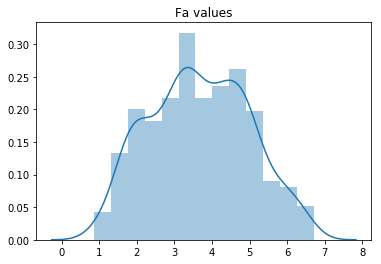

In [5]:
intrinsic_fitness = pd.Series({'DENV1': 4.57, 'DENV2': 3.42, 'DENV3': 2.14, 'DENV4': 0.00})
total_fitness = pd.read_csv('../southeast_asia/serotype/seasia_dt5_sseparams_fitness.csv', index_col=0)
''' f = f0 - fa 
   -fa = f - f0
   fa = -f + f0
'''
antigenic_fitness = total_fitness.copy().apply(lambda row: row - intrinsic_fitness, axis=1) * -1.
ax = sns.distplot(antigenic_fitness.values.flatten())
ax.set_title('Fa values')

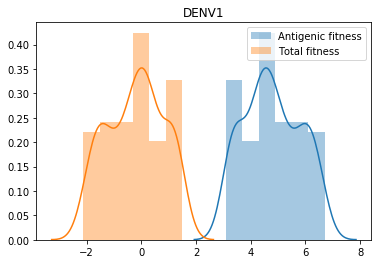

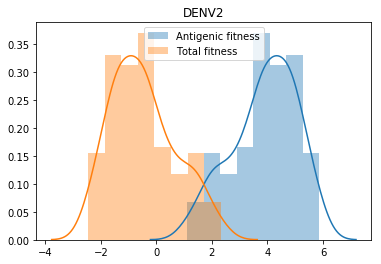

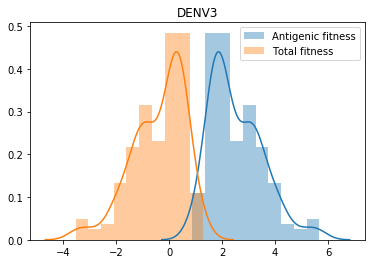

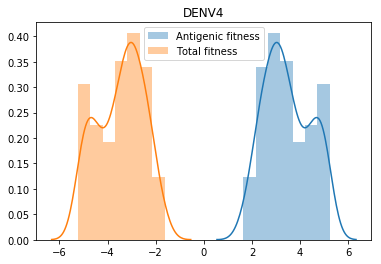

In [3]:
# Simple comparison of antigenic fitness vs total fitness (it's just a translocation, but useful to see scale)
for serotype in intrinsic_fitness.index.values:
    sns.distplot(antigenic_fitness[serotype].values.flatten(), label='Antigenic fitness')
    sns.distplot(total_fitness[serotype].values.flatten(), label='Total fitness')
    plt.title(serotype)
    plt.legend()
    plt.show()
    plt.clf()

In [4]:
# Proportion of "fitness" soaked up by Fa
Fa_plus_F0 = antigenic_fitness.apply(lambda row: row + intrinsic_fitness, axis=1) # Fa + F0
Fa_over_Fa_plus_F0 = antigenic_fitness / Fa_plus_F0 # This is not the same thing as total fitness (because F = F0 + -1*Fa)

Fa_over_Fa_plus_F0 = Fa_over_Fa_plus_F0.melt(var_name='serotype', value_name='proportion Fa') # Rearrange columns for plotting

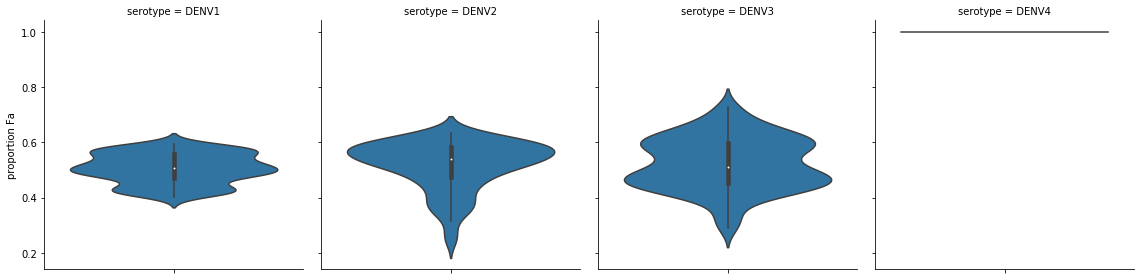

In [23]:
sns.factorplot(y='proportion Fa', data=Fa_over_Fa_plus_F0, kind='violin', col='serotype')

In [21]:
''' Toying with intrinsic-fitness-only null'''

# actual_frequencies = pd.read_csv('../source/southeast_asia_serotype_frequencies.csv', index_col=0)

# exp_intrinsic_fitness = np.exp(intrinsic_fitness*5)
# null_prediction = actual_frequencies.apply(lambda row: row * exp_intrinsic_fitness, axis=1)
# null_prediction = null_prediction.apply(lambda row: row / row.sum(), axis=1)
# null_prediction.index = null_prediction.index + 5.0
# null_prediction = null_prediction.loc[null_prediction.index <= 2015]

# def calc_timepoint_growth_rates(i, actual_frequencies, predicted_frequencies):
#     timepoints = predicted_frequencies.index.values
    
#     initial_timepoints = timepoints[8: -20]
#     initial_frequencies = actual_frequencies[i][initial_timepoints]

#     final_timepoints = timepoints[28:]
#     final_frequencies = predicted_frequencies[i][final_timepoints]

#     time_intervals = [ str(f)+'/'+str(i) for (i, f) in zip(initial_timepoints, final_timepoints)]
#     growth_rates = [ f/i for (i,f) in zip(initial_frequencies, final_frequencies)]

#     return pd.Series(growth_rates, index=time_intervals)

# null_growth_rates = pd.DataFrame({i:calc_timepoint_growth_rates(i, actual_frequencies, null_prediction) for i in null_prediction.columns.values})

# actual_growth_rates = pd.read_csv('../southeast_asia/serotype/seasia_dt5_sseparams_actual_growth_rates.csv', index_col=0)
# actual_growth_rates = actual_growth_rates.loc[actual_growth_rates.index.isin(null_growth_rates.index.values)]

# from scipy import stats
# predicted = null_growth_rates
# actual = actual_growth_rates

# assert predicted.columns.tolist() == actual.columns.tolist()
# assert actual.index.tolist() == predicted.index.tolist()

# actual, predicted = actual.values.flatten(), predicted.values.flatten()
# mask = (~np.isnan(actual)) & (~np.isnan(predicted))
# fit = stats.linregress(actual[mask], predicted[mask])

# ax=sns.regplot(actual[mask], predicted[mask])
# ax.set_xlabel('Actual growth rate')#, X(t+%d)/X(t)'%years_forward)
# ax.set_ylabel('Predicted growth rate')#, X(t+%d)/X(t)'%years_forward)
# ax.text(0,0.2,'r^2 = %.2f'%fit[2]**2, transform=ax.transAxes)
# plt.tight_layout()
